Data Diri :

---


Agus Fajar Hardeka 

---


Banjarnegara 17 Agustus 1998

---


Wanadadi RT02 RW04

---


STIMIK Tunas Bangsa Banjarnegara 

---


Sistem Informasi 2018



In [66]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.5.0


In [14]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-07-02 13:24:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.73MB/s    in 76s     

2021-07-02 13:25:18 (4.05 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [1]:
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [2]:
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [6]:
!pip install split-folders

In [7]:
import splitfolders
base_dir="/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir,output="/tmp/rockpaperscissors",seed=1337 ,ratio=(.8,.2))
train_dir=os.path.join("/tmp/rockpaperscissor","train")
validation_dir=os.path.join("/tmp/rockpaperscissors","val")

Copying files: 2188 files [00:00, 3834.21 files/s]


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./225, 
                                   rotation_range=20, 
                                   shear_range = 0.2, 
                                   horizontal_flip=True, 
                                   fill_mode = 'wrap',
                                   validation_split = 0.4)



test_datagen = ImageDataGenerator(rescale=1./225, 
                                  zoom_range = 0.2, 
                                  shear_range = 0.2, 
                                  horizontal_flip=True, 
                                  validation_split = 0.4)

In [60]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),  
        shuffle = True, 
        subset='training')


validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [61]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [80]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [81]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, berhenti!")
      self.model.stop_training = True

callbacks = myCallback()

In [82]:
history = model.fit(
    train_generator,
    steps_per_epoch = 40, 
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, 
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
40/40 - 66s - loss: 0.1034 - accuracy: 0.9672 - val_loss: 0.0846 - val_accuracy: 0.9769
Epoch 2/20
40/40 - 65s - loss: 0.0786 - accuracy: 0.9720 - val_loss: 0.1244 - val_accuracy: 0.9630

Akurasi di atas 97%, berhenti!


Saving WhatsApp Image 2021-07-02 at 21.09.38.jpeg to WhatsApp Image 2021-07-02 at 21.09.38 (3).jpeg
WhatsApp Image 2021-07-02 at 21.09.38.jpeg
kertas


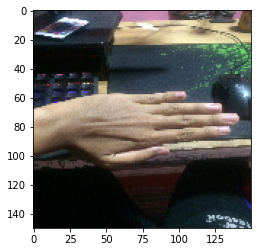

In [85]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')

Saving greensscc.jpg to greensscc (2).jpg
greensscc.jpg
gunting


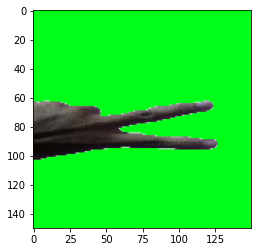

In [86]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')

Saving grenrock.jpg to grenrock (2).jpg
grenrock.jpg
batu


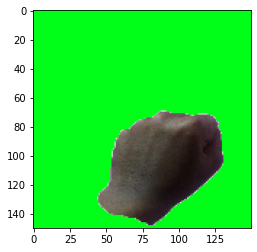

In [87]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')